**Necessary imports and uploading our dataset csv. Please upload our csv using the button bellow**

In [ ]:
import numpy as np # used for linear algebra
import pandas as pd # used for data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from google.colab import files
uploaded = files.upload()

Saving goodreads_data.csv to goodreads_data.csv


**Importing the dataset csv into the df variable**

In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['goodreads_data.csv']))

**Creating the train set**

In [ ]:
train_df=df
train_df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [ ]:
len(train_df),train_df.index.shape[-1]


(10000, 10000)

**Necessary imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from nltk import word_tokenize
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

**Printing the shape of our dataset**

In [ ]:
print("The Shape of the Dataset".format(),train_df.shape)

The Shape of the Dataset (10000, 8)


**Function for our 'Definitely Recommended" and "Recommended" books**

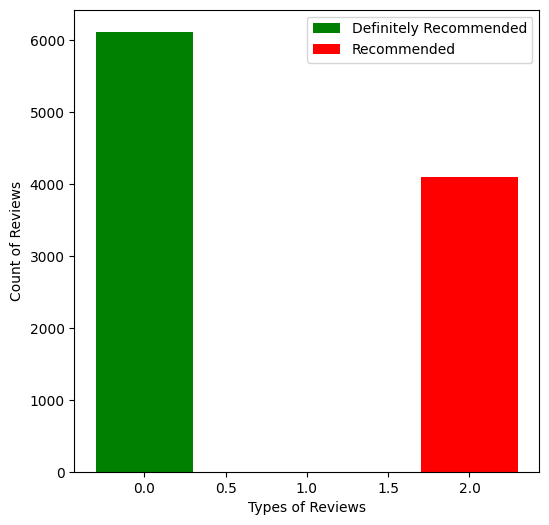

In [ ]:
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Definitely Recommended',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Recommended',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()
    
count_good=train_df[train_df['Avg_Rating']>=4.0]
count_bad=train_df[train_df['Avg_Rating']<=4.0]
plot_counts(len(count_good),len(count_bad))

**Installing the transformers library**

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Necessary imports for tokenizing and BERT model**

### **BERT MODEL**

In [ ]:
import transformers
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, TFBertModel
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

**Tokenizing using the BERT model**


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model = transformers.TFBertModel.from_pretrained('bert-large-uncased')
tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)

def bert_encode(data,max_length) :
    input_ids = []
    attention_masks = []

def tokenize(text):
    return tokenizer.encode_plus(text,add_special_tokens=True, max_length=128,padding='max_length',truncation=True,return_attention_mask=True,return_tensors='pt')

inputs = train_df['Book'].apply(tokenize)
input_ids = torch.cat([input_dict['input_ids'] for input_dict in inputs], dim=0)
attention_masks = torch.cat([input_dict['attention_mask'] for input_dict in inputs], dim=0)
labels = torch.tensor(train_df['Avg_Rating'].values)

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
z=train_df['Num_Ratings'].tolist()

In [ ]:
import tensorflow as tf

def get_embeddings(model_name,tokenizer,name,inp):
    tokenizer = tokenizer.from_pretrained(name)
    model = model_name.from_pretrained(name)
    input_ids = tf.constant(tokenizer.encode(inp))[None, :]  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs[0]
    cls_token=last_hidden_states[0]
    return cls_token
cls_token=get_embeddings(TFBertModel,BertTokenizer,'bert-base-uncased',z[0])
cls_token

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<tf.Tensor: shape=(8, 768), dtype=float32, numpy=
array([[-0.5869633 , -0.05547398, -0.11988592, ..., -0.08393089,
         0.67818564,  0.2712452 ],
       [ 0.01931668, -0.15312994,  0.18837777, ...,  0.15934284,
         1.5470779 , -0.39766064],
       [-0.3334716 ,  0.33308503,  0.4195661 , ..., -0.707422  ,
         0.75839454,  0.05976303],
       ...,
       [-0.6072829 , -0.01029058,  0.5016285 , ..., -0.74848104,
         0.800769  ,  0.4243204 ],
       [ 0.7968055 , -0.25899184,  0.592574  , ...,  0.04340281,
         0.4739278 ,  0.10751155],
       [ 0.88062793, -0.01201136, -0.341616  , ...,  0.2746557 ,
        -0.3941694 , -0.42953572]], dtype=float32)>

(8, 768)


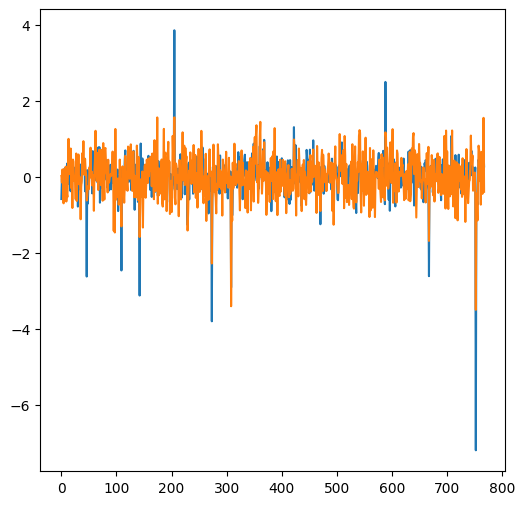

In [ ]:
print(cls_token.shape)
plt.plot(cls_token[0])
plt.plot(cls_token[1])
plt.show()

**The Cosine Distance Metric**

In this context, we will be using Cosine similarity metric from Scipy.

In [25]:
from transformers import AutoTokenizer, pipeline, TFDistilBertModel
from scipy.spatial.distance import cosine
def transformer_embedding(name,inp,model_name):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features
embedding_features1=transformer_embedding('distilbert-base-uncased',z[0],TFDistilBertModel)
embedding_features2=transformer_embedding('distilbert-base-uncased',z[1],TFDistilBertModel)
distance=1-cosine(embedding_features1[0],embedding_features2[0])
print()
print("Cosine Distance:", distance)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.



Cosine Distance: 0.9925100733793072


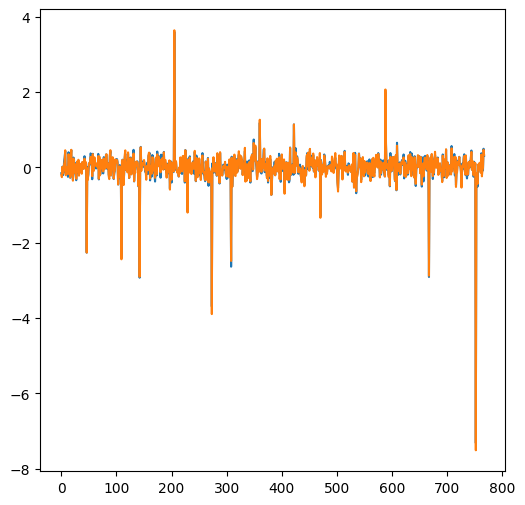

In [ ]:
#Visualize embeddings
plt.plot(embedding_features1[0])
plt.plot(embedding_features2[0])

**BERT Embeddings with Alternate Strategy**

Here we see the new methodology applied for BERT using the Pipeline module of Trasnformers.

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


0.9649594714305001


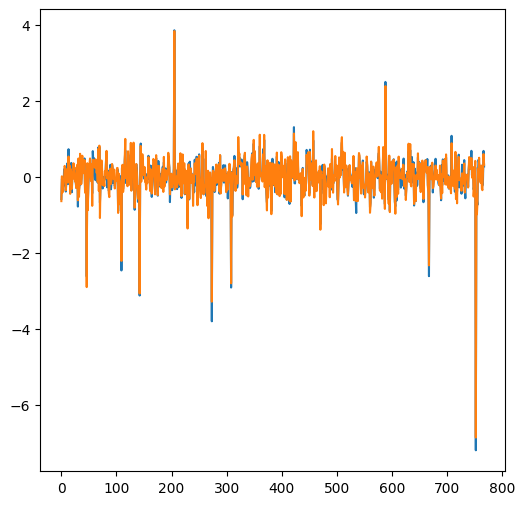

In [ ]:
##Roberta Embeddings
from transformers import AutoTokenizer, pipeline, TFRobertaModel
roberta_features1=transformer_embedding('roberta-base',z[0],TFRobertaModel)
roberta_features2=transformer_embedding('roberta-base',z[1],TFRobertaModel)
distance=1-cosine(roberta_features1[0],roberta_features2[0])
print(distance)
plt.plot(roberta_features1[0])
plt.plot(roberta_features2[0])
plt.show()